In [465]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 15})

In [ ]:
data = pd.read_csv("A579.csv", skiprows=1, sep=" ").iloc[:,:2]
# a, b = len(data)//9,3*len(data)//4
a, b = 0, 1985
plt.figure(figsize=(8, 6))
x, y = data.iloc[a:-b,0], data.iloc[a:-b,1]
plt.scatter(x, y, color="blue", s=15)



plt.xlabel("$\lambda,нм$")
plt.ylabel("Попугаи")
plt.grid()
plt.title("Образец 579")

cutt = 398
# plt.plot(x[:cutt], y[:cutt])

idx = np.argmax(y)
plt.scatter(x[idx], y[idx], color="red", label="$\lambda = {}, нм$".format(round(x[idx],1)), s=100,alpha=1.0)
plt.scatter(x[idxt], y[idxt], color="magenta", label="{}, нм".format(round(x[idxt],1)), s=100,alpha=1.0)
idxt = np.argmax(y[:cutt])

plt.legend()

print(x[idx])
print(x[idxt])

print((6.62 * 10**-34 * 2*np.pi*(3*10**8) * (10**9)/801.9)/(1.6*10**(-19)))

cut =len(x)//3
y0 = np.mean(y[:cut])

x = 6*np.pi/x * 1000
y -= y0

x = x[::-1]
y = y[::-1]


In [732]:
m0 = 9.1 * 10**(-31)
h = 6.62 * 10**(-34)
c = 3*10**8

def ktolambda(k, g):
    return (4*np.pi * c * m0*g / (h * k**2)) * 10**9

k1 = 3.51 * 10**8
k2 = 6.79 * 10**8
k1Heavy = 3.60 * 10**8
k2Heavy = 6.82 * 10**8
k1Light = 3.62 * 10**8
k2Light = 6.83 * 10**8

l1 = ktolambda(k1, 0.067)
l2 = ktolambda(k2, 0.067)
l1Heavy = ktolambda(k1Heavy, 0.11)
l2Heavy = ktolambda(k2Heavy, 0.11)
l1Light = ktolambda(k1Light, 0.20)
l2Light = ktolambda(k2Light, 0.20)

print(l1, l2)
print(l1Heavy, l2Heavy)
print(l1Light, l2Light)
print()
print("Heavy: ", ktolambda(8.48e8, 0.11))
print("Light: ", ktolambda(11.38e8, 0.2))


2818.221289833418 753.0950200280818
4398.475783601018 1225.570947864853
7909.105637727396 2221.7905227997853

Heavy:  792.7121272509843
Light:  800.3132242536539


In [744]:
kH = np.array([4e8, 7.5e8, 8.5e8])
kL = np.array([4.3e8, 8.4e8, 11.4e8])

lambdaH = np.round(ktolambda(kH, 0.11), 1)
lambdaL = np.round(ktolambda(kL, 0.2), 1)

res = pd.DataFrame({"$k_H, 10^8$" : kH/1e8, "$\lambda_H,\;\text{нм}$":lambdaH, "$k_L, 10^8$" : kL/1e8, "$\lambda_L,\;\text{нм}$":lambdaL})
print(res.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  \$k\_H, 10\textasciicircum 8\$ &  \$\textbackslash lambda\_H,\textbackslash ;\textbackslash text\{нм\}\$ &  \$k\_L, 10\textasciicircum 8\$ &  \$\textbackslash lambda\_L,\textbackslash ;\textbackslash text\{нм\}\$ \\
\midrule
0 &          4.0 &                   3562.8 &          4.3 &                   5605.4 \\
1 &          7.5 &                   1013.4 &          8.4 &                   1468.9 \\
2 &          8.5 &                    789.0 &         11.4 &                    797.5 \\
\bottomrule
\end{tabular}



/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_17710/394397943.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res.to_latex())


25.957547814602624

In [467]:
def parasha(x, eg, d, c):
    temp = np.array(x[::])
    temp[temp <= d] = 0.0
    temp[temp > d] = c
    return temp*np.exp(-x/(3*1.38) - eg/(3*1.38))


def pampushka(x, eg1, d1, c1, eg2, d2, c2):
    return parasha(x, eg1, d1, c1) + parasha(x, eg2, d2, c2)


def well3d(x, eg, c):
    temp = np.array(x[::])
    temp[temp <= eg] = 0.0
    temp[temp > eg] = 1.0
    return c*np.sqrt(temp*(x-eg))*np.exp(-x/(3*1.38))

def wells3d(x, eg1, c1, eg2, c2):
    return well3d(x, eg1, c1) + well3d(x, eg2, c2)

In [468]:
a = np.array([1, 2, 3, 4])
a[a < 3] = 0
a

array([0, 0, 3, 4])

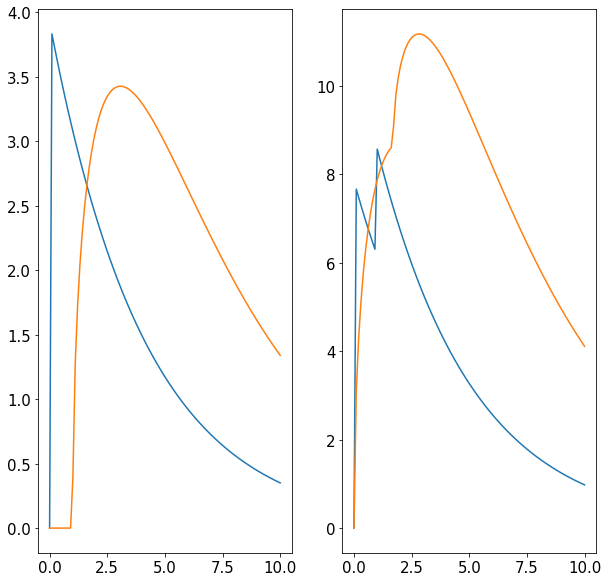

In [469]:
t = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.plot(t, parasha(t, 1, 0, 5))
plt.plot(t, well3d(t, 1, 5))

plt.subplot(122)
plt.plot(t, pampushka(t, 1, 0, 10, 2, 1, 5))
plt.plot(t, wells3d(t, 0, 10, 1.7, 5))

Text(0, 0.5, 'Четвертинки попугаев')

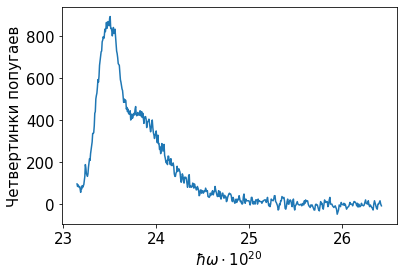

In [471]:
plt.plot(x, y)
plt.xlabel("$\hbar \omega\cdot 10^{20}$")
plt.ylabel("Четвертинки попугаев")

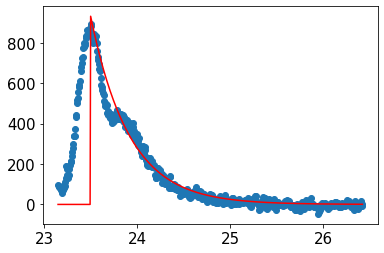

In [577]:
# popt = curve_fit(parasha, x, y, p0 = [5, 23.5, 3000])[0]
def parasha(x, eg, d, c):
    temp = np.array(x[::])
    temp[temp <= d] = 0.0
    temp[temp > d] = c
    return temp*np.exp(-(x+eg)/(0.3*1.38))


plt.scatter(x, y)
plt.plot(x, parasha(x, 20, 23.5, 4e48), color="red")

In [580]:
23.5 / (6000*np.pi)

0.0012467137208865134

In [461]:
eg1, d1, c1, eg2, d2, c2 = curve_fit(pampushka, x, y, p0=[2, 23.5, 1000, 2, 23.8, 1000])[0]
params = [eg1, d1, c1, eg2, d2, c2]

/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


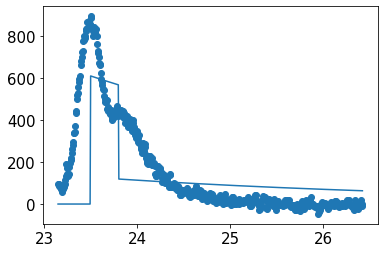

In [462]:
plt.plot(x, pampushka(x, *params))
plt.scatter(x, y)

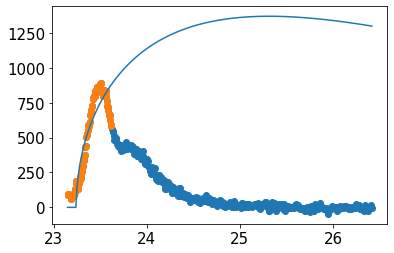

In [463]:
# params = curve_fit(wells3d, x, y, p0=[22.5, 800, 23.5, 50])[0]


cut1 = len(x)//6

p1 = curve_fit(well3d, x[:cut1], y[:cut1], p0=[23.5, 800])[0]
plt.plot(x, well3d(x, *p1))
plt.scatter(x, y)
plt.scatter(x[:cut1], y[:cut1])
# plt.plot(x, wells3d(x, *params))

/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/goloshch/.conda/envs/Sandbox/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/goloshch/.conda/envs/Sandbox/lib/

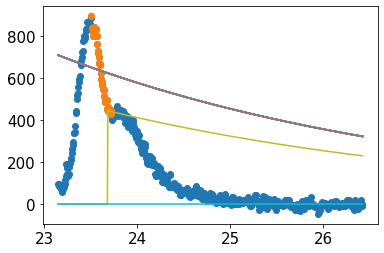

In [464]:
cut1, cut2 = len(x)//8, len(x)//5

peg = np.linspace(0, 25, 20)
pd = np.linspace(0, 25, 20)

for eg, d in zip(peg, pd):
    p1 = curve_fit(parasha, x[cut1:cut2], y[cut1:cut2], p0=[eg, d, 600])[0]
    plt.plot(x, parasha(x, *p1))
plt.scatter(x, y)
plt.scatter(x[cut1:cut2], y[cut1:cut2])

In [252]:
data = pd.read_csv("A579.csv", skiprows=1, sep=" ").iloc[:,:2]
a, b = len(data)//9,3*len(data)//4
x, y = data.iloc[a:-b,0], data.iloc[a:-b,1]

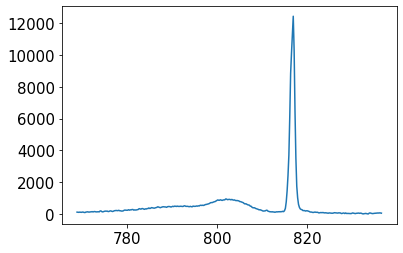

In [253]:
plt.plot(x, y)

In [89]:
data = pd.read_csv("A581.csv", skiprows=1, sep=" ").iloc[:,:2]
# a, b = len(data)//10,3*len(data)//4
a, b = 1500, 1500
x, y = data.iloc[a:-b,0], data.iloc[a:-b,1]

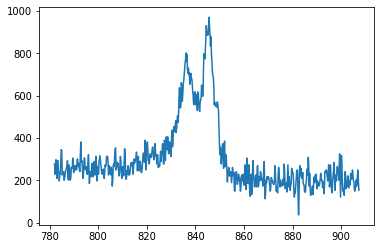

In [86]:
plt.plot(x, y)

818.5001689666371
555.5413345431962
9.72565626953069


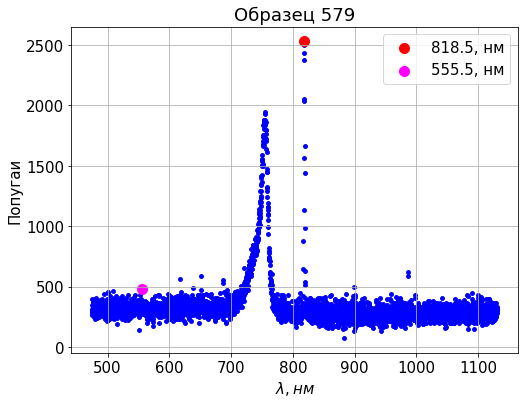

In [774]:
data = pd.read_csv("A580.csv", skiprows=1, sep=" ").iloc[:,:2]
# a, b = len(data)//9,3*len(data)//4
a, b = 0, 250
plt.figure(figsize=(8, 6))
x, y = data.iloc[a:-b,0], data.iloc[a:-b,1]
plt.scatter(x, y, color="blue", s=15)



plt.xlabel("$\lambda,нм$")
plt.ylabel("Попугаи")
plt.grid()
plt.title("Образец 579")

cutt = 398
# plt.plot(x[:cutt], y[:cutt])

idx = np.argmax(y)
plt.scatter(x[idx], y[idx], color="red", label="{}, нм".format(round(x[idx],1)), s=100,alpha=1.0)
plt.scatter(x[idxt], y[idxt], color="magenta", label="{}, нм".format(round(x[idxt],1)), s=100,alpha=1.0)
idxt = np.argmax(y[:cutt])

plt.legend()

print(x[idx])
print(x[idxt])

print((6.62 * 10**-34 * 2*np.pi*(3*10**8) * (10**9)/801.9)/(1.6*10**(-19)))

cut =len(x)//3
y0 = np.mean(y[:cut])

x = 6*np.pi/x * 1000
y -= y0

x = x[::-1]
y = y[::-1]
